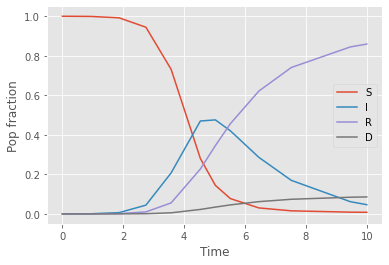

In [36]:
from scipy.integrate import solve_ivp
import numpy as np

def SIRD(t, y):
   
    S, I, R, D = y
    
    dS_dt = - beta*I*S 
    dI_dt = beta*I*S - gama*I - mi*I
    dR_dt = gama*I
    dD_dt = mi*I
    
    return [dS_dt, dI_dt, dR_dt, dD_dt ]


beta = 2.8
gama = 0.5
mi = 0.05

initial_conditions = [1, 1e-4, 0, 0]

sol = solve_ivp(SIRD, (0,10), initial_conditions)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

plt.plot(sol.t, sol.y.T)
plt.legend(['S', 'I', 'R','D']);
plt.xlabel('Time');
plt.ylabel('Pop fraction');

In [37]:
import autograd.numpy as np
from autograd import grad, elementwise_grad, jacobian
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

def swish(x):
    
    return x / (1.0 + np.exp(-x))

def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)
    return outputs

# initial guess for the weights and biases
params = init_random_params(0.1, layer_sizes=[1, 10, 4])

Text(0, 0.5, 'Pop fraction')

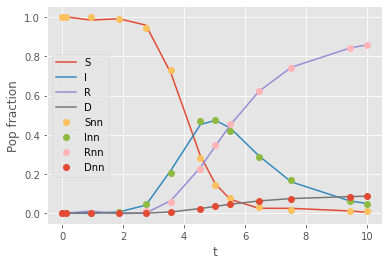

In [38]:
def objective_soln(params, step):
    return np.sum((sol.y.T - y(params, sol.t.reshape([-1, 1])))**2)

loss = []

for i in range(20):
    params = adam(grad(objective_soln), params,
                  step_size=0.001, num_iters=500)
    
    loss.append(objective_soln(params, i))

plt.plot(sol.t.reshape([-1, 1]), y(params, sol.t.reshape([-1, 1])),
         sol.t, sol.y.T, 'o')
plt.legend(['S', 'I', 'R', 'D', 'Snn', 'Inn', 'Rnn', 'Dnn'])
plt.xlabel('t')
plt.ylabel('Pop fraction')


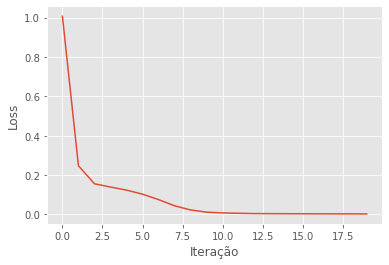

In [34]:
iter = []
for i in range(0,20):
    iter.append(i)

plt.plot(iter, loss)
plt.xlabel('Iteração');
plt.ylabel('Loss');

Text(0, 0.5, 'Pop Fraction')

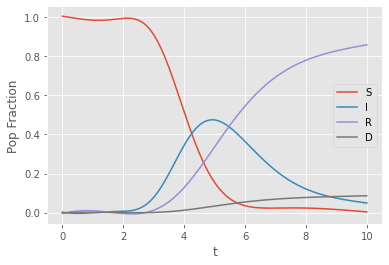

In [42]:
x = np.linspace(0,10, 500)
sird = []
for i in range(len(x)):
    sird.append(y(params,x[i]))
sird = np.array(sird)

    
plt.plot(x.reshape([-1, 1]), sird[:,0])
plt.legend(['S', 'I', 'R', 'D']);
plt.xlabel('t');
plt.ylabel('Pop Fraction');